In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [41]:
data = pd.read_csv("obesity_level.csv")
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


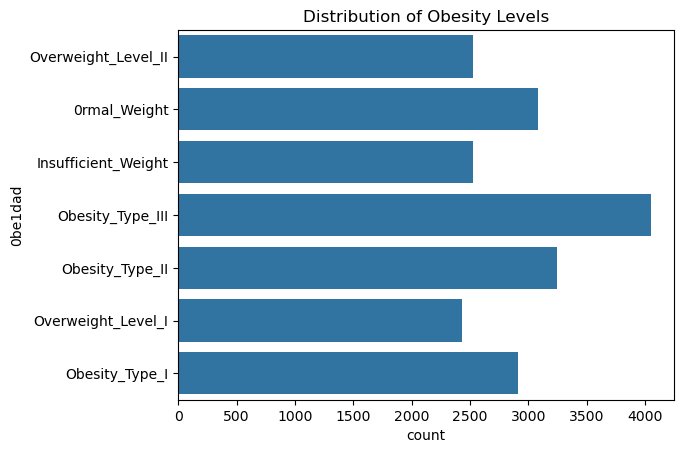

In [44]:
sns.countplot(y='0be1dad', data = data)
plt.title('Distribution of Obesity Levels')
plt.show()

In [45]:
print(data.isnull().sum())
print(data.info())
print(data.describe())

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-

In [46]:
# Standardizing continuous numerical features
continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[continuous_columns])
# Converting to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))
# Combining with the original dataset
scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

In [47]:
#One-hot encoding
#Convert categorical variables into numerical format using one-hot encoding.
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('0be1dad') 
# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output = False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# Converting to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combining with the original dataset
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)


In [48]:
prepped_data['0be1dad'] = prepped_data['0be1dad'].astype('category').cat.codes
prepped_data.head()

,id,family_history_with_overweight,FAVC,SMOKE,SCC,0be1dad,Age,Height,Weight,FCVC,...,Gender_Male,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CALC_Frequently,CALC_Sometimes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1,1,0,0,6,0.105699,-0.002828,-0.235713,-0.836279,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,1,0,0,0,-1.027052,-1.606291,-1.170931,-0.836279,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,1,0,0,1,-1.027052,0.128451,-1.430012,-1.060332,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,1,1,0,0,4,-0.507929,0.120090,1.644770,1.039171,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,4,1,1,0,0,6,1.371197,2.450367,0.224054,0.438397,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
# Preparing final dataset
X = prepped_data.drop('0be1dad', axis=1)
y = prepped_data['0be1dad']

In [50]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [18]:
# Predictions
y_pred_ova = model_ova.predict(X_test)

# Evaluation metrics for OvA
print("One-vs-All (OvA) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova),2)}%")

One-vs-All (OvA) Strategy
Accuracy: 76.25%


In [42]:
#Logistic Regression with OvO
# Training logistic regression model using One-vs-One
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [43]:
# Predictions
y_pred_ovo = model_ovo.predict(X_test)

# Evaluation metrics for OvO
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%")

One-vs-One (OvO) Strategy
Accuracy: 86.56%


In [76]:
#Q3. Write a function obesity_risk_pipeline to automate the entire pipeline:
def obesity_risk_pipeline(data_path, test_size):
    data = pd.read_csv(data_path)
    #standardization
    continuous_column = data.select_dtypes(include=['float64']).columns.tolist()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[continuous_column])
    #converting it to a dataframe
    scaled_df = pd.DataFrame(scaled_features, columns = scaler.get_feature_names_out(continuous_column))
    #combinig data with original dataset
    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)
    #Convert categorical variables into numerical format using one-hot encoding.
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('0be1dad')
    encoder = OneHotEncoder(sparse_output = False, drop ='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
    prepped_data['0be1dad'] = prepped_data['0be1dad'].astype('category').cat.codes
    X = prepped_data.drop('0be1dad', axis=1)
    y = prepped_data['0be1dad']
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
     # Training and evaluation
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

obesity_risk_pipeline("obesity_level.csv", test_size=0.2)



Accuracy: 0.7861271676300579


In [ ]:
#CODES FROM OTHER RESOURCESSS

In [ ]:
# logistic regression for multi-class classification using built-in one-vs-rest
# define dataset


In [59]:
# logistic regression for multi-class classification using built-in one-vs-rest
# define dataset

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features = 10, n_informative = 5, n_redundant = 5, n_classes=5, random_state =42)
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)
print("Accuracy on training data:", accuracy_score(y, yhat))

Accuracy on training data: 0.561


In [61]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')

log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.7640009635071661
Test accuracy: 0.7613198458574181


In [62]:
log_reg.intercept_

array([ -3.22098174,  -6.40727981,  -3.90625032, -19.90476651,
        -4.52155375,  -1.12666129,  -1.61675936])

In [63]:
log_reg.coef_

array([[-1.02585564e-05,  7.38271195e-02, -1.40567012e-01,
         9.40427674e-01, -6.22424779e-01, -1.99207497e-01,
        -1.41309772e-01, -1.77825660e+00, -1.06345458e-02,
         2.58025202e-01, -1.40004793e-01,  9.16250723e-02,
        -2.22176923e-01,  6.33031066e-01,  1.60668764e+00,
        -4.68521411e-01,  8.20834876e-02, -1.63879137e-01,
        -1.36403875e-01,  1.01886477e+00,  1.47330149e+00,
         4.28594269e-01,  1.07747669e+00],
       [-1.10775241e-05, -4.92495827e-01, -2.46168945e-01,
        -4.73186091e-01,  1.92795865e-02, -4.95974901e-01,
         1.61346851e+00, -8.16058474e+00,  1.83167307e-01,
         2.85933847e-02,  8.49504129e-02, -8.40125066e-03,
         2.97299632e-01, -1.82570488e-01, -3.42951588e+00,
        -1.26256810e+00, -2.25328139e+00, -1.15033136e+00,
        -2.80263738e-01, -2.31122275e-01, -4.59541196e-01,
        -1.34299788e+00, -1.99402178e+00],
       [-1.39005312e-05,  2.05920432e+00,  1.08912037e+00,
        -2.92089666e-01, -1.2

In [65]:
X_test.shape

(4152, 23)

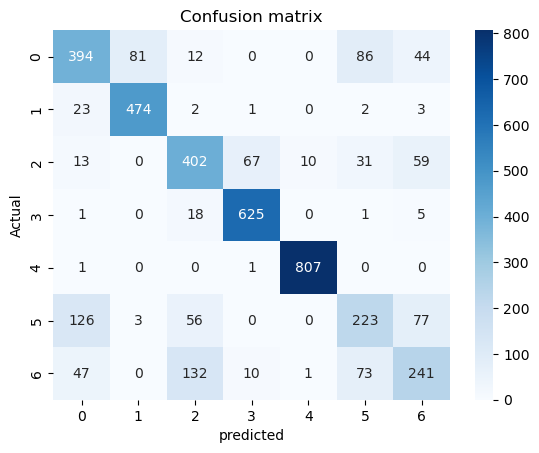

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ova)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

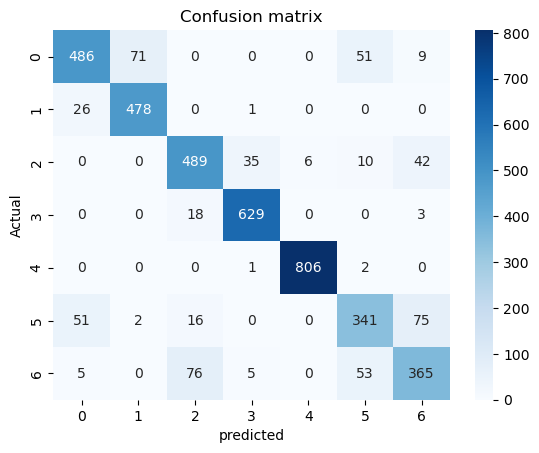

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_ovo)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()